 # Lecture6 : Approximating the Posterior 
 
 ## Instructor: Dr. Hu Chuan-Peng  


**Intro**

我们回到纣王选举的例子，在lec3中，选举结果只受到一个单一支持率$“\pi”$的影响，但这是一个简化的模型。

如果我们想让这个模型更接近现实，那么更多的影响因素就会被包含在内，例如：
- 纣王的公众形象
- 纣王的军事威慑
- 纣王的执政能力

和支持率$pi$一样，这些影响因素都可以用参数来表示 $\theta = (\theta_1, \theta_2, \ldots, \theta_k)$

/image

之前我们仅在贝叶斯公式中考虑了一个参数变量$\theta$的情况，而当代入更多的参数$\theta_k$时：

$$
f(\theta_k | y) = \frac{f(\theta_k)L(\theta_k | y)}{f(y)}
$$ 
* 此时的$f(\theta_k)$与$L(\theta_k|y)$都是多元函数，即他们返回的结果是关于多个参数而不仅是一个参数。

问题在于，但此时参数$\theta$的数量增多，计算$f(y)$的计算难度就会变大：

$$
f(y) = \int_{\theta_1}\int_{\theta_2} \cdots \int_{\theta_k} f(\theta)L(\theta | y) d\theta_k \cdots d\theta_2 d\theta_1
$$

* 原因在于对于一个参数$\theta$来说，$f(y) = f(\theta)$ * $L(\theta|y)$是$\theta$的所有取值下所以似然值的积分(可以理解为求和) $\int_{\theta} f(\theta)L(\theta | y) d\theta$
* 而当参数变多，我们需要对所有的参数组合$\int_{\theta_1}\int_{\theta_2} \cdots \int_{\theta_k} f(\theta)L(\theta | y) d\theta_k \cdots d\theta_2 d\theta_1$进行积分，计算量会大大增加。


因此，与其**暴力**的计算后验分布，我们是否可以通过一些**省力**的方法来近似后验分布？

在lec6中，我们介绍两种近似方法：
1. 网格近似
2. MCMC

## Grid approximation 网格近似
![Image Name](https://www.bayesrulesbook.com/bookdown_files/figure-html/unnamed-chunk-177-1.png)


> * 想象有一张图像(图三)，但你不能完整地看到它。不过你可以从左到右每次取一个这个图像中的一个小格来观察它。
> * 只要格子越细，最后组合在一起就会与完整的图片更近似

在网格近似中，后验分布$f(\theta | y)$其实就是完整的图片。我们可以选择有限个$\theta$，并观察对应的$f(\theta | y)$，以此来近似完整的后验分布。


（以一个参数为例）网格近似可以分为以下四个步骤：
1. 选定一系列离散的$\theta$值
2. 计算每个$\theta$值对应的先验分布$f(\theta)$和似然函数$L(\theta|y)$
3. 对于所有的$\theta$值，计算$f(\theta)$与$L(\theta|y)$二者的乘积并相加，再进行归一化
4. 归一化后，根据$\theta$值的后验概率分布，随机抽取$N$个$\theta$值

我们以Beta-Binomial的例子来演示这四个步骤

### A Beta-Binomial example

现在假设先验$\pi$ 服从

$$
\pi    \sim \text{Beta}(2, 2)
$$

似然函数为：
$$
Y|\pi  \sim \text{Bin}(10, \pi)
$$

> * 这是我们在lec3熟悉的beta-binomial模型，假设$\pi$反映的是支持率，似然函数反映的则是在某个支持率下，总投票数为10时，支持票数的分布概率情况。
> $$Y | \pi  \sim \text{Bin}(n, \pi)$$
> $$\pi \sim \text{Beta}(\alpha, \beta)$$
> * 在观察到 n 次时间中有 Y = y次目标事件后，$\pi$的后验分布可以用Beta模型来描述，反映了先验（通过α和β）和数据（通过y和n）的影响：
> $$\pi | (Y = y) \sim \text{Beta}(\alpha + y, \beta + n - y) $$

假设支持票数为9，我们通过共轭先验的公式，可以直接计算出$Beta$后验分布的两个参数：
$$Y + \alpha = 9 + 2\;\;, \;\;\;\;\;\;\;\; n - Y + \beta = 10 - 9 + 2$$
$$\pi | (Y = 9) \sim \text{Beta}(11, 3) $$

**代码示例：网格近似估计后验分布**

现在我们暂时忘记后验的简便计算方法，使用网格近似来对后验分布进行估计。

**step1：** 首先，我们将从0~1内的连续变量$\pi$中取出6个值：$\pi \in \{0, 0.2, 0.4, 0.6, 0.8, 1\}$

In [1]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [113]:
pi_grid = np.linspace(0,1,6)

**step2、3：**
    在每一个$\pi$下，计算先验分布$\Beta(2, 2)$，与似然函数$Bin(10, \pi)$ (Y=9)的乘积，计算总和并进行归一化

In [114]:
prior = st.beta.pdf(pi_grid, 2, 2)
likelihood = st.binom.pmf(9, 10, pi_grid)
posterior = prior * likelihood / np.sum(prior * likelihood)

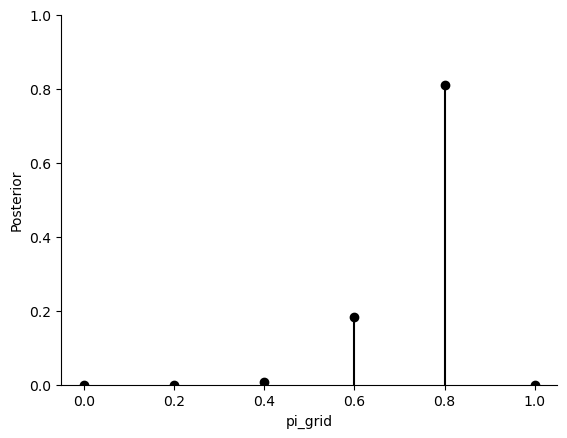

In [98]:
plt.stem(pi_grid, posterior,    # 使用 plt.stem() 绘制垂直柱状图，表示在 pi_grid 上的 posterior 分布
         linefmt='black',
         bottom=-1)  

plt.ylim(0, 1)                  # 设置 y 轴范围在 0 到 1 之间
plt.xlabel('pi_grid')           # 设置 y 轴范围在 0 到 1 之间
plt.ylabel('Posterior')         # 设置 y 轴范围在 0 到 1 之间
sns.despine()                   # 使用 sns.despine() 函数去除图形的上方和右侧的边框

**step4：**
    得到后验结果($\pi$)的分布后，从这个分布中抽样10000次

*由于$\pi$的取值只在 $\{0, 0.2, 0.4, 0.6, 0.8, 1\}$之中，从上图中可以看到，只有0.6与0.8的概率值相对较高

In [115]:
np.random.seed(84735)

posterior_sample = np.random.choice(pi_grid,        # pi_grid 为抽样的候选集合
                                    size=10000,     # 从 posterior 分布中随机抽取 10000 个样本
                                    p=posterior,    # p=posterior 为抽样的概率分布
                                    replace=True)   # replace=True 表示有放回抽样

posterior_sample = pd.DataFrame({"pi_sample": posterior_sample})    # 将抽取的样本存储在 DataFrame 中，列名为 "pi_sample"


In [100]:
posterior_sample.value_counts(normalize=True).reset_index()        # 对 posterior_sample 中的样本进行计数，并使用 normalize=True 将计数转换为相对频率
                                                                   # 然后通过 reset_index() 将结果重新设置为 DataFrame

,pi_sample,proportion
0,0.8,0.8060
1,0.6,0.1858
2,0.4,0.0082


**抽样结果图示**

可以看到，在抽样的结果中，$\pi$大多都是0.6或0.8，少部分是0.4

我们对比一下抽样得到的后验分布图 和 实际的后验分布$Beta(11, 3)$

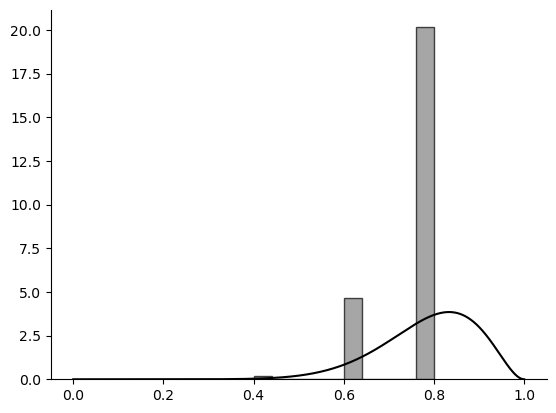

In [116]:
x_beta = np.linspace(0, 1, 10000)       # 生成10000 个点，范围在 [0, 1] 之间

y_beta = st.beta.pdf(x_beta, 11, 3)     # 生成 Beta(11,3)

plt.plot(x_beta, y_beta, color='black') # 绘制 beta(11,3)


plt.hist(posterior_sample["pi_sample"], # 绘制 10000次抽样结果
         edgecolor = "black",
         color="grey",
         alpha = 0.7,
         density=True,)

sns.despine()

**增加网格数**

* 这个结果当然过度简化了后验分布，还记得我们刚刚说，只要取的网格越多，对后验的估计会更准确。

* 那么，现在$\pi$不取6个值，而是在0~1之间取101个值$\pi \in \{0, 0.01, 0.02, \ldots, 0.99, 1\}$

* 同样的，我们执行上述四个步骤：

In [ ]:
pi_grid = np.linspace(0, 1, 101)            # 生成一个 101 个点，范围在 [0, 1] 之间

prior = st.beta.pdf(pi_grid, 2, 2)          # 生成 Beta(2,2)


likelihood = st.binom.pmf(9, 10, pi_grid)   # 生成二项分布, 参数为 n=10（总试验次数），k=9（成功次数），以及 pi_grid 中的每个概率值


posterior = prior * likelihood / np.sum(prior * likelihood)     # 计算后验概率，即先验概率和似然函数的乘积，然后除以归一化常数（分母和）

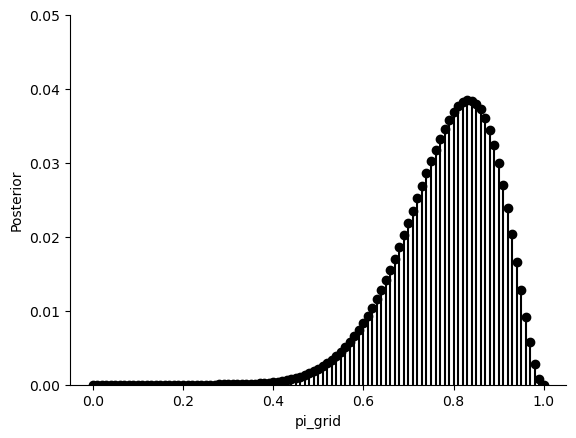

In [103]:
# 画图
plt.stem(pi_grid, posterior,
    linefmt='black',
    bottom=-1)
plt.ylim(0, 0.05) 
plt.xlabel('pi_grid')
plt.ylabel('Posterior')
sns.despine()

In [106]:
np.random.seed(84735)

posterior_sample = np.random.choice(pi_grid,        # pi_grid 为抽样的候选集合，
                                    size = 10000,   # 从 posterior 分布中随机抽取 10000 个样本，使用 np.random.choice()
                                    p=posterior,    # p=posterior 为抽样的概率分布
                                    replace=True)   # replace=True 表示有放回抽样

posterior_sample = pd.DataFrame({"pi_sample": posterior_sample})    # 将抽取的样本存储在 DataFrame 中，列名为 "pi_sample"

可以看到，在此次的抽样中，$\pi$的取值更加多样

In [107]:
posterior_sample.value_counts(normalize=True).reset_index()        # 对 posterior_sample 中的样本进行计数，并使用 normalize=True 将计数转换为相对频率
                                                                   # 然后通过 reset_index() 将结果重新设置为 DataFrame

,pi_sample,proportion
0,0.82,0.0410
1,0.84,0.0380
2,0.79,0.0379
3,0.80,0.0374
4,0.83,0.0372
...,...,...
60,0.37,0.0004
61,0.35,0.0004
62,0.41,0.0003
63,0.39,0.0002


**抽样结果图示**

对比一下抽样得到的后验分布图 和 实际的后验分布$Beta(11, 3)$

相比于上一次，这一次的结果更加接近真实的后验分布

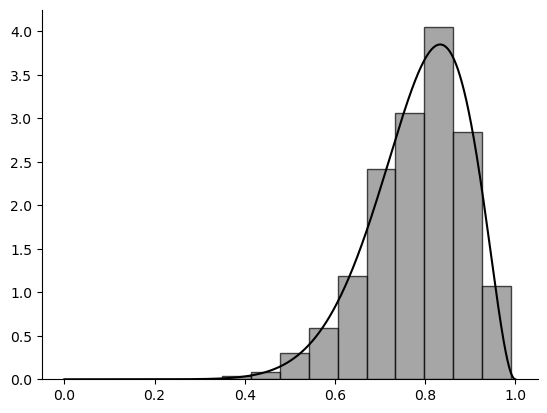

In [112]:
x_beta = np.linspace(0,1,10000)             # 生成一个 10000 个点，范围在 [0, 1] 之间
y_beta = st.beta.pdf(x_beta, 11, 3)         # 生成Beta(11,3)

plt.plot(x_beta, y_beta, color='black')     # 绘制Beta(11,3)

plt.hist(posterior_sample["pi_sample"],     # 绘制10000个抽样结果分布
         edgecolor = "black",
         color="grey",
         alpha = 0.7,
         density=True,)

sns.despine()

## 练习

> 📃以**Gamma-Poisson模型**为例来练习网格近似

设$\lambda$是中国在亚运会期间每天获得金牌的**平均次数**，我们将$\lambda$的先验分布设为$\text{Gamma}(3, 1)$

Y为数据，即每天中国实际获得的金牌数量，则：

$$
\begin{equation} 
\begin{split}
Y_i|\lambda & \stackrel{ind}{\sim} \text{Pois}(\lambda) \\
\lambda   & \sim \text{Gamma}(3, 1)  . \\
\end{split}
\tag{6.2}
\end{equation}
$$

如果在第一天中国获得2枚金牌 ($Y_1 = 2$)，在第二天获得金牌的数量为8 ($Y_2 = 8$)

后验分布:
$$
\lambda | ((Y_1,Y_2) = (2,3)) \sim \text{Gamma}(13, 3) 
$$

### step1: 选定一系列离散的$\lambda$值

1. 在(0,15)这个范围内选择501个$\lambda$值

> 注：由$\lambda$的先验与似然函数分布图我们可以看到，$\lambda$>15的可能性很小
![ImageName](https://www.bayesrulesbook.com/bookdown_files/figure-html/ch6-gam-pois-1.png)

In [ ]:
#===========================================================================
#                            在(0,15)这个范围内选择501个$\lambda$值
#                            在...中填入相应的值
#===========================================================================
lambda_grid = np.linspace(...,...,...)

### step2: 在每一个$\pi$下，计算先验分布，与似然函数的乘积，计算总和并进行归一化

In [ ]:
# 定义似然函数，由于该似然函数不能通过调用已有的函数获得，因此我们根据得到的公式定义一个
def poisson_likelihood(y):
    lambda_grid = np.linspace(0,15,501)
    
    # Calculate the Poisson likelihood for each lambda
    likelihood_poisson = np.exp(-len(y) * lambda_grid) * np.power(lambda_grid, np.sum(y)) / np.prod([np.math.factorial(val) for val in y])

    return likelihood_poisson

In [5]:
#===========================================================================
#                            请修改 ... 中的值。
#===========================================================================
observed_data = [...,...]                                   # 定义观察到的数据

likelihood_poisson = poisson_likelihood(...)                # 生成对应的似然值

prior_gamma = st.gamma.pdf(..., a=..., scale=...)           # 定义先验

posterior_lambda = ...                                      # 计算后验概率，即先验概率和似然函数的乘积，然后除以归一化常数（分母和）


### step4: 得到后验结果($\lambda$)的分布后，从这个分布中抽样10000次

In [ ]:
#===========================================================================
#                            请修改 ... 中的值。
#===========================================================================
np.random.seed(84735)
lambda_sample = np.random.choice(...,                   # 输入抽样集合
                                 size = ...,            # 输入抽样的样本个数
                                 p=...,                 # 输入抽样的概率分布
                                 replace=True)          # replace=True 表示有放回抽样

lambda_sample = pd.DataFrame({"lambda_sample": lambda_sample})

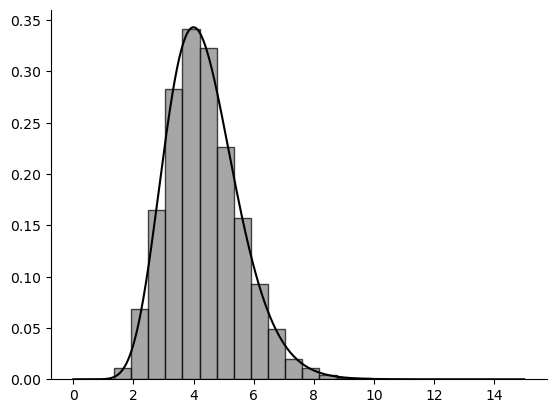

In [10]:
x_gamma = np.linspace(0,15,10000)                   # 生成一个 10000 个点，范围在 [0, 15] 之间
y_gamma = st.gamma.pdf(x_gamma, a=13, scale=1/3)    # 生成Gamma(13,3)下, x对应的概率值

plt.plot(x_gamma, y_gamma, color='black')           # 绘制Beta(11,3)

plt.hist(lambda_sample["lambda_sample"],            # 绘制10000个抽样结果分布
         edgecolor = "black",
         bins=15,
         color="grey",
         alpha = 0.7,
         density=True,)

sns.despine()

### limitations 网格近似的局限性

😎或许你也注意到了，上述模型还是只有一个参数的情况

当模型的参数越来越多时，网格近似就会遇到“维数灾难问题”

在这里我们只需要简单理解为：当模型参数越来越多时，网格近似需要的计算成本也越来越高。

## Markov chains via pymc

**“Markov chain Monte Carlo(MCMC)”**

在计算具有多个参数的后验分布时，有一种有效的方法叫做马尔科夫链蒙特卡洛(MCMC)，可以用于模拟和**近似**后验概率分布

- 前一个MC中的Markov 来源于一个俄国数学家的名字 Andrey Markov。
  - 他研究并提出一种数学方法，被命名为马尔科夫链。用于描述状态空间中经过从一个状态到另一个状态的转换的随机过程。
  - 该过程要求具备 **“无记忆性”**，即下一状态的概率分布只能由当前状态决定，在时间序列中它前面的事件均与之无关。
  - 马尔可夫链在机器学习和深度学习中非常广泛，例如分层隐马尔可夫模型HMM (Hidden Markov Model)和卡尔曼滤波模型。
- 而后一个MC (Monte Carlo)则是一个赌场的名字。据说来自于 20 世纪 40 年代绝密核武器项目的，其中斯坦尼斯拉夫-乌拉姆、约翰-冯-诺伊曼和他们在洛斯阿拉莫斯国家实验室的合作者使用马尔可夫链来模拟和更好地理解中子旅行现象（Eckhardt，1987）。洛斯阿拉莫斯团队将他们的工作称为 "蒙特卡洛"，据说这一选择是受到法国里维埃拉富丽堂皇的蒙特卡洛赌场的启发。

<div flex>
 <img src = "https://th.bing.com/th/id/OIP.2U0OXNsB-PAANwh633wwAAHaH4?pid=ImgDet&rs=1"></img>
 <img src = "https://th.bing.com/th/id/R.3fc3e64c713c8d0b23b35ddefd58f7b7?rik=VhVysWSSa5Odkw&riu=http%3a%2f%2fimages1.fanpop.com%2fimages%2fphotos%2f1600000%2fMonte-Carlo-Monaco-monaco-1674129-1600-1200.jpg&ehk=Pwha1hAfe5wsKDZ0wtekYQ3Wfh%2fxRroqAA9ZOnWTs6E%3d&risl=&pid=ImgRaw&r=0"></img>
</div>


**MCMC的采样特点**

1. 和网格法类似，MCMC并不会从后验分布$f(\theta|y)$中直接采样
2. 并且区分与网格法，MCMC的样本不是互相独立的 ———下一个样本值依赖于上一个样本值

![](https://pic2.zhimg.com/80/v2-696651b37f2dc6a472c314f1ba78194d_1440w.webp)
> source: https://zhuanlan.zhihu.com/p/250146007


假设后验分布仍是关于$\theta$的分布，$\left\lbrace \theta^{(1)}, \theta^{(2)}, \ldots, \theta^{(N)} \right\rbrace$ 构成了一个长度为N的**马尔科夫链**

- ——>其中，$\theta^{(2)}$ 的结果依赖于 $\theta^{(1)}$，$\theta^{(3)}$ 的结果依赖于 $\theta^{(2)}$.... $\theta^{(3)}$ 的结果依赖于 $\theta^{(i+1)}$ 的结果依赖于 $\theta^{(i)}$
- ——> 总的来说，$\theta^{(i+1)}$ 的结果依赖于 $\theta^{(i)}$和收集到的数据y

$$
f\left(\theta^{(i + 1)} \; | \; \theta^{(1)}, \theta^{(2)}, \ldots, \theta^{(i)}, y\right) = f\left(\theta^{(i + 1)} \; | \; \theta^{(i)}, y\right)  .
$$

> 注意：$\theta^{(i+1)}$ 依赖于 $\theta^{(i)}$，而 $\theta^{(i)}$ 又依赖于$\theta^{(i-1)}$
> 然而，$\theta^{(i+1)}$ 独立于 $\theta^{(i-1)}$，这是马尔科夫链 **“无记忆性”**的特点。

在lec7中，我们将更详细地介绍MCMC的具体原理，现在有很多的统计工具来帮助我们进行MCMC模拟。

在这节课中，我们主要介绍使用Pymc来进行MCMC模拟的基本过程。

## What is Pymc?

## A Beta-Binomial example in pymc

 *我们使用的仍然是本节课一开始的  投票数例子*


> 先验分布为：$$\pi    \sim \text{Beta}(2, 2)$$
> 似然函数为：$$ Y|\pi  \sim \text{Bin}(10, \pi)$$
> 总投票数为10，支持票数为9(Y = 9)

In [1]:
import pymc as pm
import arviz as az

In [2]:
Y = 9

bb_model = pm.Model()

with bb_model:
    pi = pm.Beta('pi', alpha=2, beta=2)
    likelihood = pm.Binomial('likelihood', n=10, p=pi, observed=Y)

### 代码解释

```
Y = 9

bb_model = pm.Model()

with bb_model:
    pi = pm.Beta('pi', alpha=2, beta=2)
    likelihood = pm.Binomial('likelihood', n=10, p=pi, observed=Y)

```

在pymc中，一个模型的定义通常包含了先验和似然两部分(其复杂性视模型复杂程度而定)：

1. 设立容器
    * 在pymc中，你需要创建一个`pm.Model()`来容纳你模型中的变量

    * 接下来你需要定义模型里的各种参数，即`with bb_model:`，表明接下来你对模型中各参数的设定，都会被添加到该模型中

    * 或者也可以直接一步写成：`with pm.Model() as bb_model:`

2. 定义先验
    * 在这个例子中，我们需要对$\pi$进行定义

3. 定义似然
    * 我们通过observed = Y，将收集到的数据传入似然函数中


### 模型可视化

可以通过PyMC3自带的可视化工具将模型关系可视化

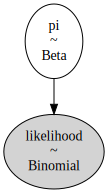

In [42]:
pm.model_to_graphviz(bb_model)

### 使用mcmc进行采样

In [22]:
#采样过程仍在该容器中进行
with bb_model:
    trace = pm.sample(draws=5000,                   # 使用mcmc方法进行采样，draws为采样次数
                      tune=5000,                    # tune为调整采样策略的次数，可以决定这些结果是否要被保留
                      chains=4,                     # 链数
                      discard_tuned_samples= True,  # tune的结果将在采样结束后被丢弃
                      random_seed=84735)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [pi]


Sampling 4 chains for 5_000 tune and 5_000 draw iterations (20_000 + 20_000 draws total) took 47 seconds.


In [23]:
az.plot_trace(trace)

(4, 5000)

### 采样的时间进程

下图展示了第一条Makov链的前20个采样结果和前200个结果


array([[<Axes: title={'center': 'pi'}>, <Axes: title={'center': 'pi'}>]],
      dtype=object)

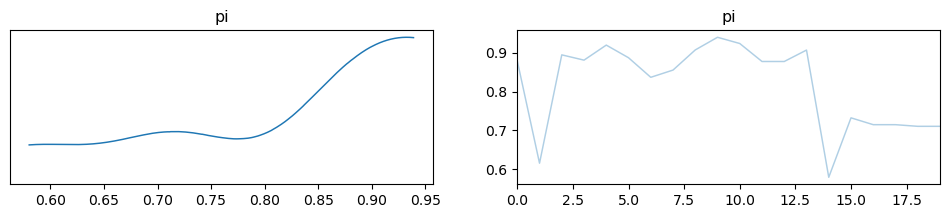

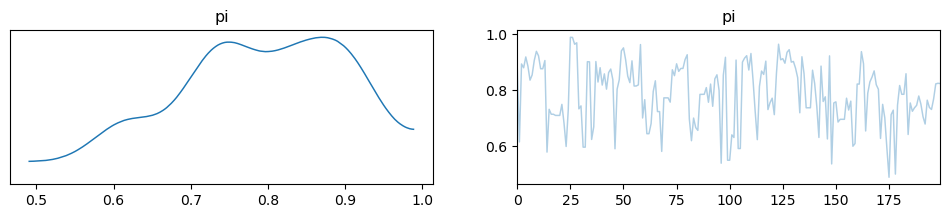

In [25]:
# 选取第一条Makov链的前20个采样结果和前200个结果
samples_20 = trace.posterior["pi"].sel(chain=0).values[:20]
samples_200 = trace.posterior["pi"].sel(chain=0).values[:200]

# 绘图
az.plot_trace({"pi": samples_20})
az.plot_trace({"pi": samples_200})


In [54]:
post_pi = pd.DataFrame({"pi": trace.posterior["pi"].values.reshape(-1)})
post_pi

### 采样结果可视化

* 把4条链总共20000个采样结果绘制成直方图和密度图分布，并对比真实的后验分布(黑线)Beta(11, 3)

* 可以看到这个采样结果很好地近似了后验分布

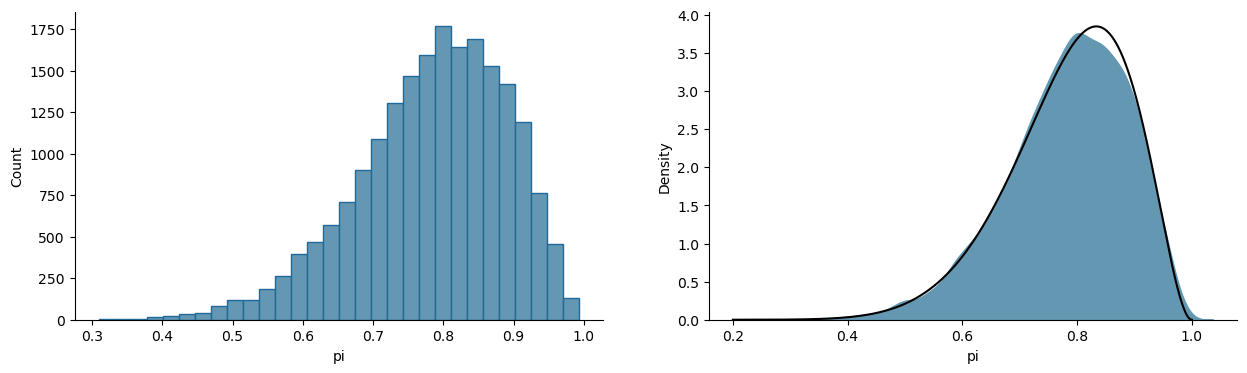

In [73]:
fig, (axs1, axs2) = plt.subplots(1, 2, figsize=(15, 4))

#绘制采样结果直方图
sns.histplot(data=post_pi, 
             x="pi", 
             bins=30,
             ax=axs1,
             edgecolor='#20699d', 
             color="#6497b1",
             alpha = 1)

#绘制采样结果密度分布图
sns.kdeplot(data=post_pi,
             x="pi",
             color='#6497b1',
             fill=True,
             alpha = 1,
             ax=axs2)

#绘制真实后验分布图
x = np.linspace(0.2, 1, 10000)
y = st.beta.pdf(x, 11, 3)
axs2.plot(x, y, color='black')


sns.despine()

## 练习
> 📃以**Gamma-Poisson模型**为例来练习使用pymc进行MCMC模拟

设$\lambda$则是每小时事件发生的平均次数，我们将$\lambda$的先验分布设为$\text{Gamma}(3, 1)$

Y是一个小时内事件发生的次数，则：

$$
\begin{equation} 
\begin{split}
Y_i|\lambda & \stackrel{ind}{\sim} \text{Pois}(\lambda) \\
\lambda   & \sim \text{Gamma}(3, 1)  . \\
\end{split}
\tag{6.2}
\end{equation}
$$

如果在第一个小时内事件发生的次数为2 ($Y_1 = 2$)，第二个小时内事件发生的次数为8 ($Y_2 = 8$)

后验分布:
$$
\lambda | ((Y_1,Y_2) = (2,3)) \sim \text{Gamma}(13, 3) 
$$

In [3]:
import pymc as pm
import arviz as az

In [15]:
#===========================================================================
#                            请修改 ... 中的值。
#===========================================================================

data = [...,...]
#1. 设立容器

with pm.Model() as gp_model:
    #2. 定义先验
    lambda_ = pm.Gamma('lambda_', alpha=..., beta=...)
    #3. 定义似然
    obs = pm.Poisson('obs', mu=lambda_, observed=...)

In [16]:
#===========================================================================
#                            请修改 ... 中的值。
#===========================================================================
with gp_model:
    trace = pm.sample(draws=...,                    # 采样次数设为5000次
                      tune=...,                     # 调整次数设为5000次
                      chains=...,                   # 链为4条
                      discard_tuned_samples= True, 
                      random_seed=84735)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [lambda_]


Sampling 4 chains for 5_000 tune and 5_000 draw iterations (20_000 + 20_000 draws total) took 52 seconds.


In [17]:
trace

Inference data with groups:
	> posterior
	> sample_stats
	> observed_data

array([[<Axes: title={'center': 'lambda_'}>,
        <Axes: title={'center': 'lambda_'}>]], dtype=object)

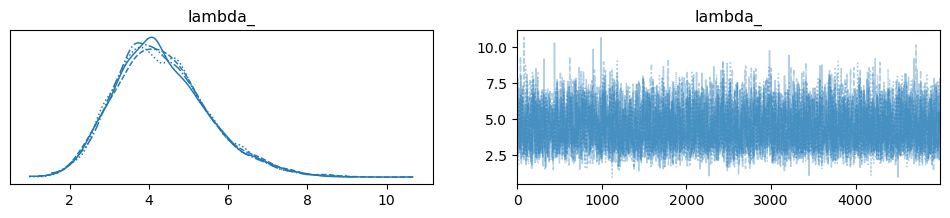

In [21]:
az.plot_trace(trace)

In [18]:
post_lambda = pd.DataFrame({"lambda": trace.posterior["lambda_"].values.reshape(-1)})

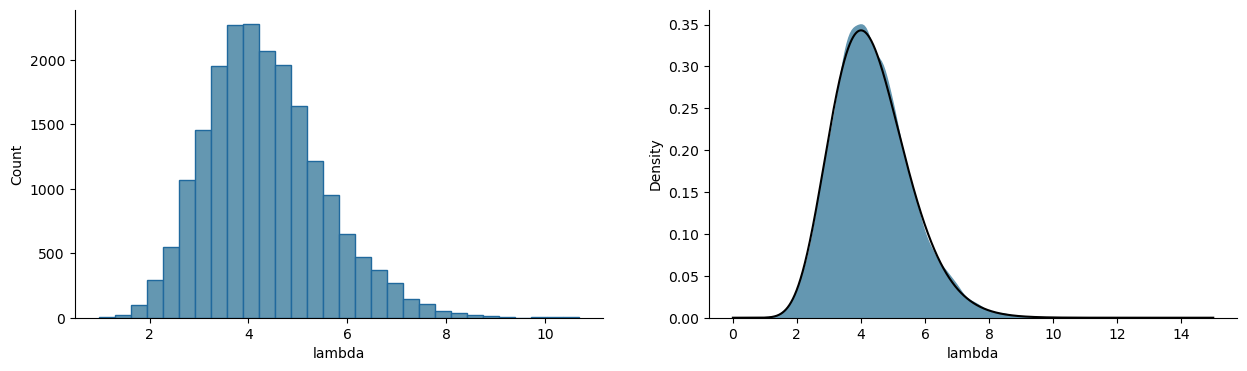

In [20]:
fig, (axs1, axs2) = plt.subplots(1, 2, figsize=(15, 4))

sns.histplot(data=post_lambda, 
             x="lambda", 
             bins=30,
             ax=axs1,
             edgecolor='#20699d', 
             color="#6497b1",
             alpha = 1)

sns.kdeplot(data=post_lambda,
             x="lambda",
             color='#6497b1',
             fill=True,
             alpha = 1,
             ax=axs2)

x = np.linspace(0, 15, 10000)
y = st.gamma.pdf(x, a=13, scale=1/3)
axs2.plot(x, y, color='black')


sns.despine()

## 对马尔科夫链的诊断 (Markov chain diagnostics) 

在之前的例子中，我们看到马尔科夫链遍历了参数（π 或 λ）的样本空间，并最终模拟了收敛到后验的随机样本。

而模拟采样方法的关键是 "近似 "和 "收敛"

这就引出了以下问题：

- 好的马尔可夫链是什么样的？
- 如何判断马尔可夫链样本是否产生了合理的后验近似值？
- 马尔可夫链样本量应该多大？

诊断的意义：因为我们不知道真实的后验，这意味着我们无法将模拟结果与 "真实 "后验结果进行比较。因此，诊断具有重要的参考意义。

在本节中，我们将重点介绍几种诊断方法

- 可视化诊断：轨迹图 (trace plot)和平行链 (parallel chains)。
- 诊断指标：有效样本大小 ESS(effective sample size)、自相关性 (autocorrelation)和 $\hat{R}$ (R-hat)。
    
> 这些诊断方法的使用应综合考虑。由于没有一种视觉或数值诊断方法是万能的，因此将它们放在一起考虑时，可以更全面地反映马尔可夫链的质量。

### trace plots

轨迹图 (trace plot) 是一种可视化方法，用于显示马尔可夫链的轨迹，即马尔可夫链在参数空间中的位置。
- 图中的横坐标是时间步长，纵坐标是参数的值。
- 轨迹图往往结合参数的后验分布一起展示，以便于观察采样样本对于参数分布的代表性。

我们先来看一下正常的轨迹图是什么样：

- 这是之前 Beta-Binomial model 的示例。
- 图左：轨迹图看起来像一堆白噪声，没有明显的趋势或现象，这意味着**链是稳定的**。 
- 图右：展示了正常的参数后验分布的情况。

一个糟糕的轨迹图可能看起来像这。显然这种条件下的后验参数分布在用于后续推断时是必须非常谨慎的：



图中上部分链 A：

- 链 A 中的轨迹图显示，它在 5000 次迭代后还没有稳定下来，并且它只探索了 0.6 到 0.9 之间的参数值。
  - 下降趋势也暗示着链值之间存在着很强的相关性--它们看起来并不像独立的噪音。
  - 虽然马尔可夫链本身具有依赖性，但它们越像噪声(独立样本的表现)，得出的后验近似值误差就越小（粗略地说）。
- 结合后验分布图：**它的后验近似值高估了真实分布中央部分，而完全低估了这个范围之外值的可信度**。

图中下部分链 B：   
- 链 B 表现出不同的问题，迹线图中的部分区域存在**两条完全平直的线**所显示的那样，
  - 这意味着，**当它采样到较小的参数值时，往往会陷入这个值的附近，** 这也表明了一种局部的高相关性。
  - 链条 B 在陷入困境时，会对后验参数左侧尾部的值进行**过度采样**。         
- 结合密度图
  - 虽然链 B 后验分布和真实分布的重合性更好，但它存在多峰分布，原因在于过度采样。

如果我们得到一个糟糕的轨迹图，我们可以采取一些措施：

- 1.检查模型。确定假定的**先验模型**和**数据模型**是否合适？    
- 2.对数据链进行**更多迭代**。一些不理想的短期连锁趋势可能会在长期内得到改善。

### 有效样本大小 ESS(effective sample size)和自相关性 (autocorrelation)

独立性的重要性：马尔可夫链的表现越像独立样本，所得到的后验近似误差就越小（宽泛地说）。

相对来说，需要多少独立样本值才能产生同样精确的后验近似值？

- 有效样本大小和自相关性为可视化轨迹图诊断提供了具体的参考指标，以评估马尔可夫链在多大程度上表现得像独立的样本

**自相关性 (autocorrelation)**

- 可用于评估马尔科夫链的样之间的独立性，即无记忆性。
- 强烈的自相关性或依赖性是一件坏事--它**与较小的有效样本比相伴而生**，因此提供了一个警告信号，表明我们得出的后验近似值可能不可靠。
    
根据马尔可夫链的简单构造，链值之间必然存在一些自相关性--一个链值（π(i)）取决于前一个链值（π(i-1)），而前一个链值（π(i-2)）又取决于前一个链值（π(i-3)），依此类推。**这种依赖链还意味着，每个链值都在一定程度上依赖于之前的所有链值**。

- 例如，π(i) 取决于π(i-1)，而π(i-1) 取决于π(i-2)，因此π(i) 也取决于π(i-2)。
- 然而，**这种依赖性或自相关性会逐渐消失**。
    
> 这就像托布勒的地理学第一定律：万事万物都与其他事物相关，**但近处的事物比远处的事物更相关**。


**有效样本量比率 Effective sample size ratio**

$\frac{N_{neff}}{N}$
- N 表示依赖马尔可夫链的实际样本量或长度。 
- Neff 为马尔可夫链的有效样本大小，量化了产生等效精确后验近似所需的独立样本数量。
- Neff 越大越好，但马尔可夫链近似的准确性通常只能达到较小独立样本的准确性。也就是说，
- 通常情况下，Neff < N，因此有效样本大小比小于1。我们往往会对有效样本量比小于 0.1 的马尔可夫链产生怀疑，即 Neff/N < 10%。

假设马尔科夫链的长度为 20,000，并且包括 6800 个独立样本，即有效样本量 ESS = 6800。
- 因此，有效样本量比率 EFF=34%，代表相当于我们只使用了 34% 的独立样本。
- 由于这个比例高于 0.1，这是是可以接受的。并且 ESS > 400。
  
> 更详细的定义请参见 Vehtari 等人（2021）。如需了解有效样本量, R-hat等指标的的联系，请参阅 Vats 和 Knudson (2018)。

**补充，如何计算ESS**


ESS表示与独立和均匀采样相当的有效样本数量，可以使用以下公式计算：

ESS = N / τ

- 其中，N是总的采样数量。
- τ为自相关时间。

估计自相关时间（Autocorrelation Time，τ）：自相关时间表示样本之间的相关性消失所需的步数。它可以通过截尾自相关函数进行估计。自相关时间τ可以通过求和截尾自相关函数的面积来估计，可以使用以下公式计算：

τ = 1 + 2 * Σ(TACF(lag))

- 其中，lag表示滞后的范围。


计算自相关函数（Autocorrelation Function，ACF）：
- 首先，计算采样序列中不同滞后（lag）的自相关系数。
- 滞后为0时，自相关系数等于1；滞后为1时，自相关系数表示第一个样本与第二个样本之间的相关性；以此类推。
- 自相关函数的计算可以使用统计软件或编程语言中的相关函数。

计算截尾自相关函数（Truncated Autocorrelation Function，TACF）：
- 为了避免计算无限滞后的自相关系数，通常会截取滞后一定范围内的自相关系数。
- 选择一个合适的截断范围，例如滞后至自相关系数小于0.1，可以避免过多计算。


### R-hat and comparing parallel chains

假如我们获得了四条并行的马尔可夫链。我们不仅希望看到每条链的稳定性，还希望看到**四条链的一致性**。

可以想象，如果四条链的结果并不一致，那么推断结果的可靠性就很难保证。

同样，我们首先展示一个良好的并行链的结果：

为了便于比较和展示一个糟糕的并行链的结果，我们用更短的马尔可夫链模拟来演示。

- 运行四条并行链仅进行 100 次迭代，每次产生 50 个样本量：

虽然这些链的轨迹图表现出相似的随机行为，但它们对应的密度图却不尽相同，因此产生的后验近似值也不尽相同。

这表明，如果我们只进行了 100 次迭代就停止模拟，那结果是不稳的。

此外，不同链样本之间的变异性的一致性非常重要。

首先展示一个正常的结果，其中四条链具有相似的变异：

- 中图显示，四条链的可变性几乎是相同的。
- 因此，右图中，所有链的变异与综合为单个链的变异性相似。

一个糟糕的例子：


- 四条平行链产生了相互冲突的后验近似值（中图）
- 当我们将这些链组合在一起时，后验近似值不稳定且较差（右图）。
- 因此，所有链中参数值的范围和变异性远大于任何单个链中参数值的范围和变异性。

我们可以直观地看出，所有链条上的数值变化与单个并行链条内部的数值变化之间的关系非常重要。具体来说

- 在 "好的 "马尔可夫链模拟中，所有并行链的变异性总和将与任何单个链内的变异性**大致相当**；
- 在 "坏的 "马尔可夫链模拟中，所有并行链的变异性总和可能**超过**每个链内的典型变异性
    
我们可以使用 $\hat{R}$ 量化综合链变异性和链内变异性之间的关系。

$\hat{R}$ 指标（称 "R-hat"）为并行链的可视化比较提供了具体的数学指标。


$$
\hat{R} = \frac{V_{combined}}{V_{within}}
$$
- $\hat{R}$ 通过比较所有链上采样值的变异性和每个单独链上的变异性来解决一致性问题。
- combined 代表所有链的样本值的总变异。
- within 代表每个链内部样本值的变异。

理想情况下，$\hat{R}$ ≈1，反映了平行链的稳定性。
- 相反，$\hat{R}$ > 1表示链之间的变异不稳定，即组合链内的变异性大于单个链内的变异性。
- 虽然不存在黄金法则，但$\hat{R}$比率大于1.05会给模拟的稳定性带来危险信号。

> 更详细的定义请参见 Vehtari 等人（2021）。如需了解有效样本量, R-hat等指标的的联系，请参阅 Vats 和 Knudson (2018)。

对于示例1

- $\hat{R}$ 值等于 1，这反映了四个并行链之间和链内部的变异性存在很好的一致性。

对于示例2
- $\hat{R}$ = 5.35，这表明所有链值的方差总和是每个链内典型方差的 5 倍多。这远远超过了 1.05 的标准，充分证明假设平行链并没有产生一致的后验近似值。
- 因此 MCMC 的模拟近似是不稳定的。其后验分布的结果不可用于后续推断。

### 总结

随着我们的贝叶斯模型越来越复杂，比如，一个回归模型加入越来越多的预测变量 (预测纣王的当选的可能)

这些模型的**后验将变得难以直接获得，或者无法获得**。

我们学习了在这种情况下逼近后验的两种模拟技术：
- 网格逼近和马尔科夫链蒙特卡罗。
- 两种技术都会产生 N 个 θ 参数值样本。注意，这里的 θ 可能包含多个参数。

最后，我们学到了一些用于检查 MCMC 模拟质量的诊断方法。
- 可视化：直观地检查多个并行链的轨迹图和密度图，以确定模拟的稳定性和混合性。
- 数学指标：用有效样本量比、自相关性和 $\hat{R}$等数值诊断来补充这些视觉诊断。